In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
from plume_learn.plume_utils import remove_all_0_plume
from plume_learn.viz import show_images
from plume_learn.PlumeDataset import plume_dataset

ModuleNotFoundError: No module named 'plume_learn.plume_utils'

In [1]:
%load_ext autoreload
%autoreload 2

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
sys.path.append('../../plume_dynamic_analyzer/src/')

from plume_utils import remove_all_0_plume
from viz import show_images
from PlumeDataset import plume_dataset

In [2]:
df_plume_all = []
for key in ['yg063']:
    file = glob.glob(f'../../data/Plumes/SRO_plume_metrics/{key}*metrics.csv')[0]
    print(file)
    df = pd.read_csv(file, index_col=0)
    df['Threshold'].astype(str)
    df = df[df['Threshold']=='200']
    df = remove_all_0_plume(df.reset_index(), metric='Area', viz=False)
    if key == 'YG065_pre':
        df['Growth'] = 'YG065_pre'
    df_plume_all.append(df)
df_plume_all = pd.concat(df_plume_all, ignore_index=True)
df_plume_all

# df_merged_hotcore = pd.merge(df_condition, df_plume_all, on='Growth')
# df_merged_hotcore

../../data/Plumes/SRO_plume_metrics\YG063_metrics.csv


plume_index  time_index  Distance    Velocity    Area Threshold Growth
0                0           0         0         0.0     0.0       200  YG063
1                0           1         0         0.0     0.0       200  YG063
2                0           2        46  92000000.0   852.0       200  YG063
3                0           3        93  94000000.0  3190.0       200  YG063
4                0           4       136  86000000.0  8585.0       200  YG063
...            ...         ...       ...         ...     ...       ...    ...
48123          377         123       210         0.0     0.0       200  YG063
48124          377         124       210         0.0     0.0       200  YG063
48125          377         125       210         0.0     0.0       200  YG063
48126          377         126       210         0.0     0.0       200  YG063
48127          377         127       210         0.0     0.0       200  YG063

[48128 rows x 7 columns]

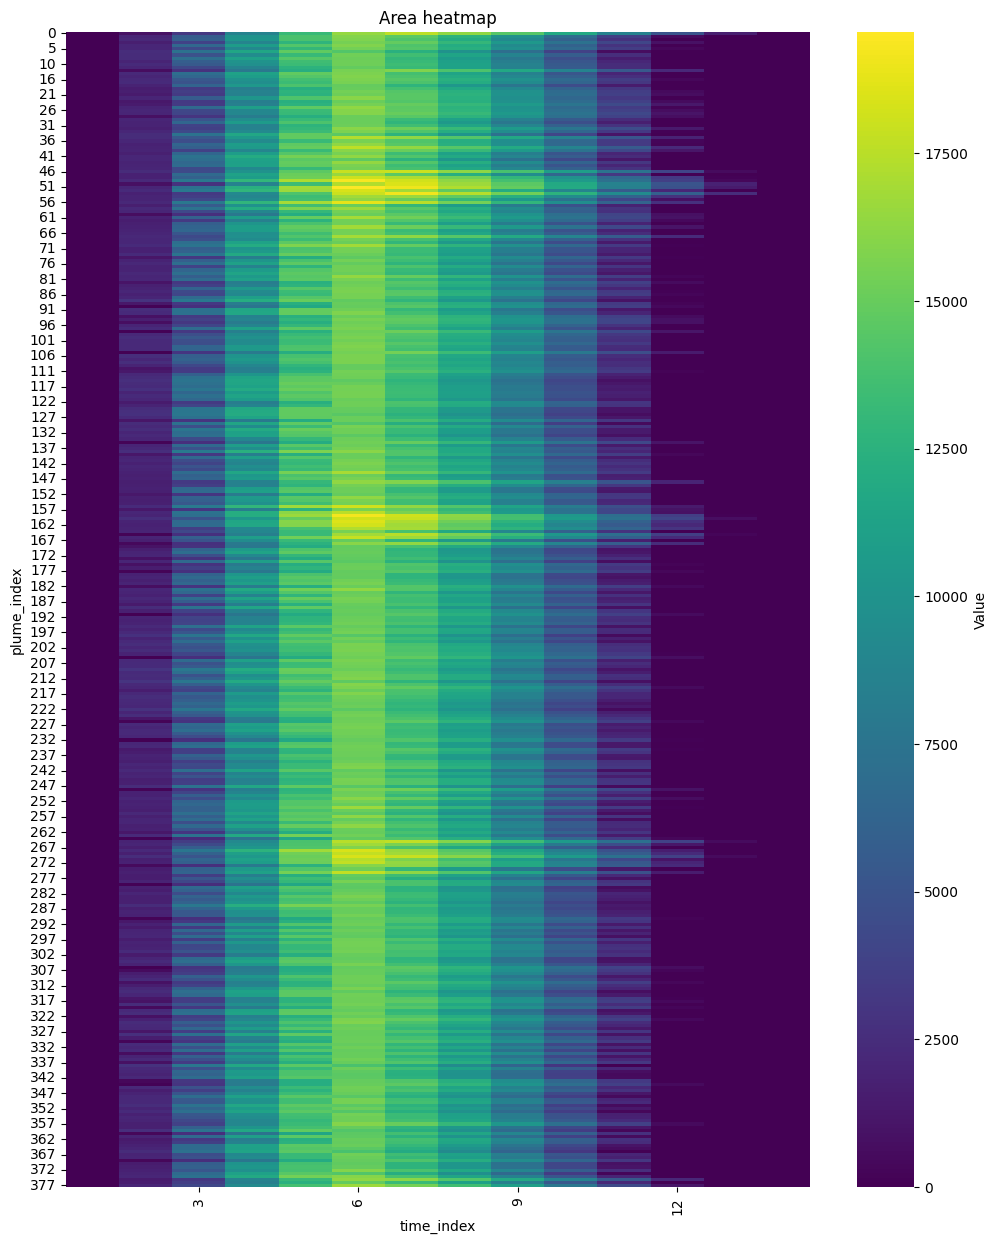

In [4]:
df_pivot = df_plume_all.pivot(index="plume_index", columns="time_index", values="Area")
plt.figure(figsize=(12, 15))
sns.heatmap(df_pivot, cmap='viridis', cbar_kws={'label': 'Value'})
plt.xlabel("time_index")
plt.ylabel("plume_index")
plt.title("Area heatmap")
plt.xlim(1, 15)
plt.show()

#### parse the plume for specific frame

In [17]:
file = 'D:/pld_plumes/SRO_STO_Drexel/YG063_YichenGuo_08042024.h5'
plume_ds = plume_dataset(file_path=file, group_name='PLD_Plumes')
keys = plume_ds.dataset_names()
print(keys)
plumes = plume_ds.load_plumes('1-SrRuO3')
print(plumes.shape)

['1-SrRuO3', '1-SrRuO3_Pre']
(380, 128, 250, 400)


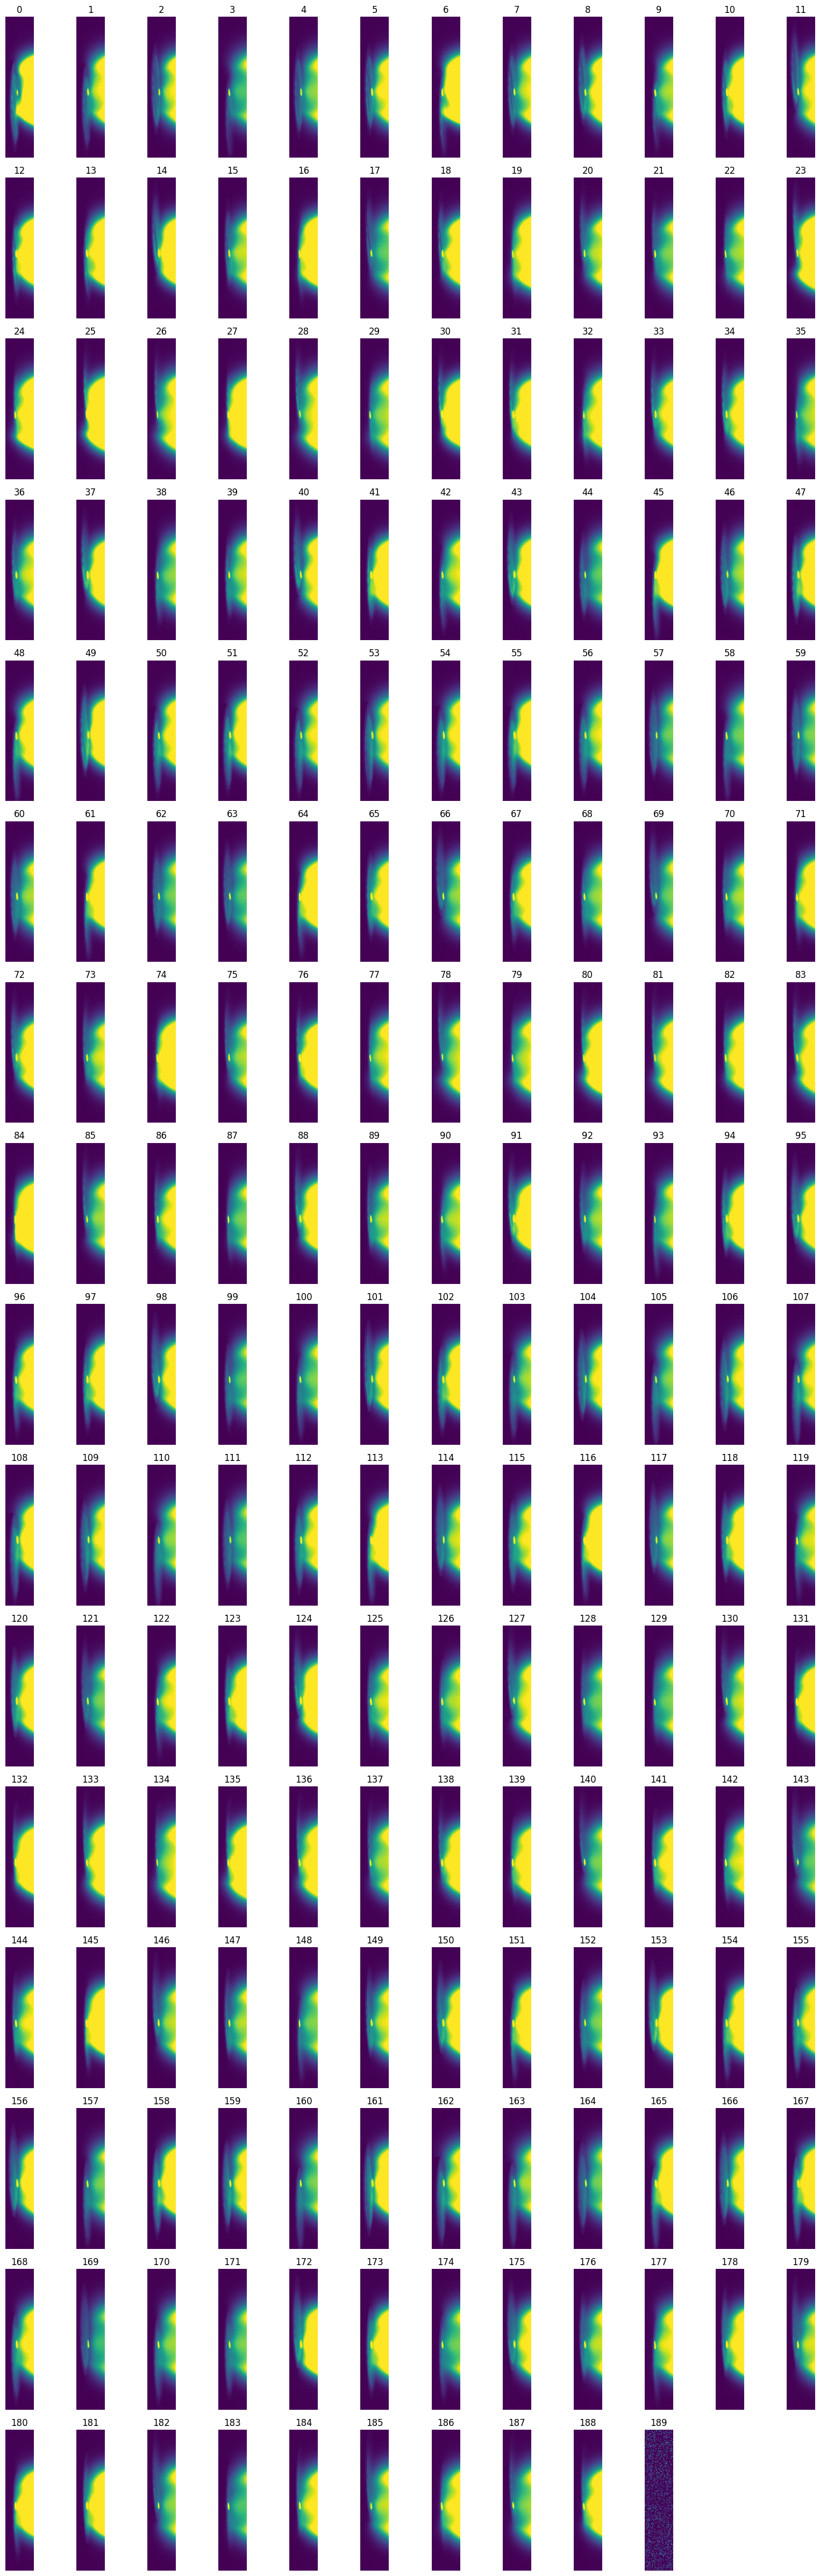

In [29]:
plume_sample = plumes[::2, 6, :, :50]
show_images(plume_sample, img_per_row=12, img_height=3)

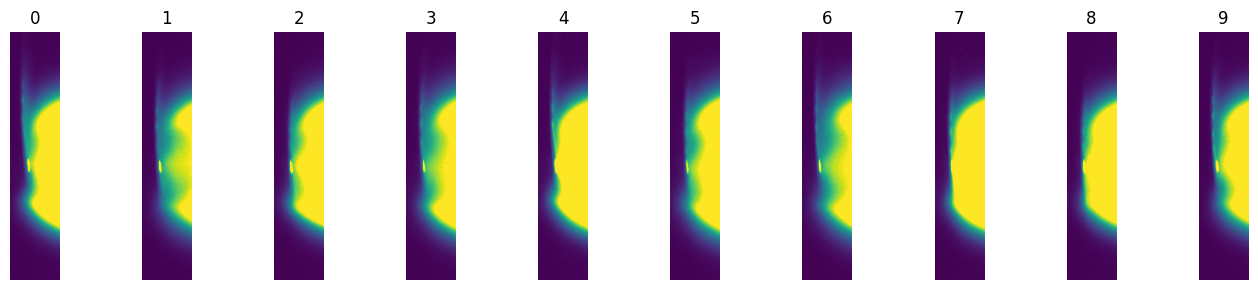

In [24]:
plume_sample = plumes[46:56, 6, :, :50]
show_images(plume_sample, img_per_row=12, img_height=3)

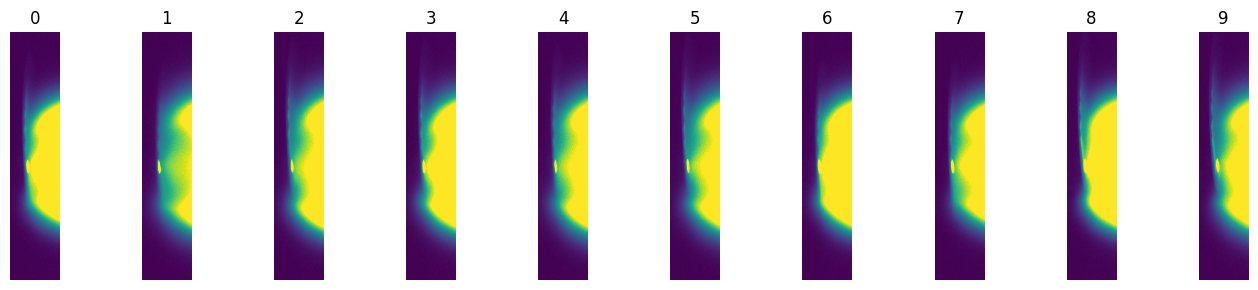

In [27]:
plume_sample = plumes[157:167, 6, :, :50]
show_images(plume_sample, img_per_row=12, img_height=3)

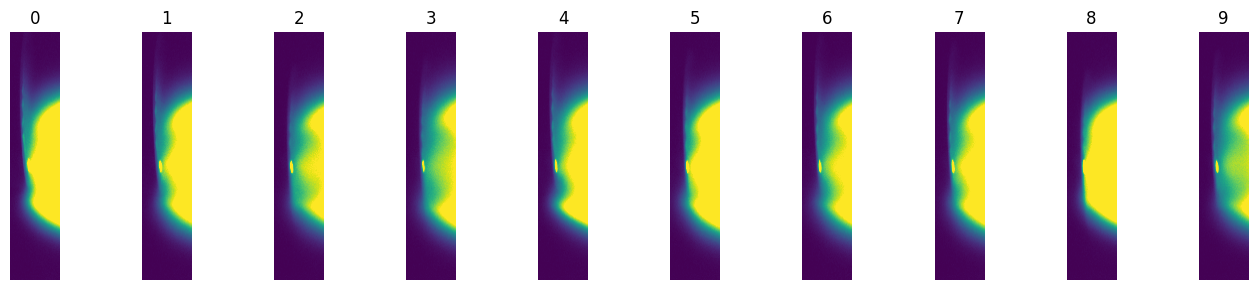

In [30]:
plume_sample = plumes[265:275, 6, :, :50]
show_images(plume_sample, img_per_row=12, img_height=3)